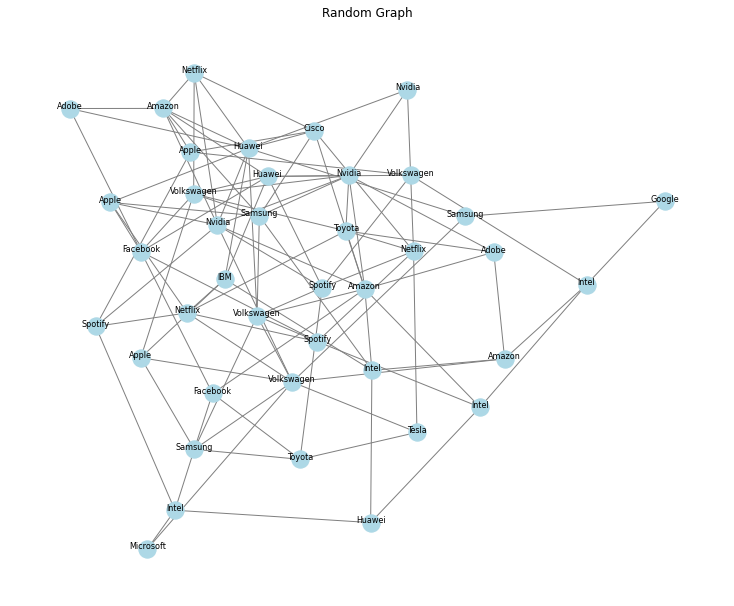

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
import numpy as np
import random

company_names = [
    "Amazon", "Google", "Apple", "Microsoft",
    "Toyota", "Volkswagen", "Tesla", "BMW",
    "Samsung", "Intel", "IBM", "Facebook",
    "Huawei", "Cisco", "Nvidia", "Adobe",
    "Netflix", "PayPal", "Spotify", "Airbnb"
]

random_graph = nx.gnm_random_graph(n=40, m=105)  # 30개의 노드와 45개의 엣지를 가진 그래프
random_company_names = {node: random.choice(company_names) for node in random_graph.nodes}

# 그래프 시각화
plt.figure(figsize=(10, 8))
pos_random = nx.spring_layout(random_graph)
nx.draw(random_graph, pos_random, with_labels=False, node_color='lightblue', edge_color='gray')
# 노드 라벨 추가 (회사 이름)
for node, position in pos_random.items():
    plt.text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
    
plt.title("Random Graph")
plt.show()

In [5]:
# 가상의 데이터 생성
np.random.seed(42)
X = np.random.rand(300, 2)

In [12]:
X.shape

(40, 40)

In [30]:
X = nx.to_numpy_array(random_graph)

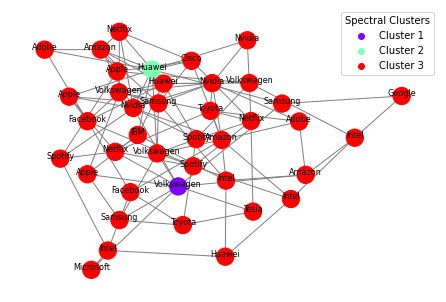

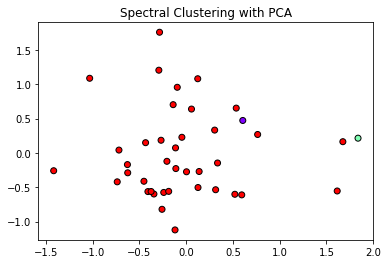

In [55]:
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

def estimate_sigma(data):
    # Calculate pairwise distances between data points
    pairwise_distances = euclidean_distances(data, data)
    
    # Set sigma to the mean of the distances
    sigma = np.mean(pairwise_distances)
    
    return sigma

def create_similarity_matrix(data, sigma):
    n = len(data)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            similarity_matrix[i, j] = np.exp(-euclidean(data[i], data[j])**2 / (2 * 1.0**2))
            similarity_matrix[j, i] = similarity_matrix[i, j]

    return similarity_matrix

def spectral_clustering(similarity_matrix, n_clusters):
    laplacian_matrix = np.diag(np.sum(similarity_matrix, axis=1)) - similarity_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')

    centroids, labels = kmeans(eigenvectors, n_clusters)
    
    return labels

def kmeans(data, k, max_iters=100):
    n, m = data.shape
    centroids = data[np.random.choice(n, k, replace=False)]
    labels = np.zeros(n)
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis=0)
    
    return centroids, labels


# Sigma 값 추정
sigma = estimate_sigma(X)

# 유사성 행렬 생성
similarity_matrix = create_similarity_matrix(X, sigma)

# 스펙트럴 클러스터링
n_clusters = 3
labels = spectral_clustering(similarity_matrix, n_clusters)

# 결과 시각화
colors_sc = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))

nx.draw(random_graph, pos_random, node_color=labels, cmap=plt.cm.rainbow, with_labels=False, edge_color='gray')
for node, position in pos_random.items():
    plt.text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
#plt.set_title('Spectral Clustering on Company KG Graph')

for i, color in enumerate(colors_sc):
    plt.scatter([], [], color=color, label=f'Cluster {i+1}')
plt.legend(title="Spectral Clusters", loc="upper right")
plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors_sc[labels], edgecolor='k')
plt.title('Spectral Clustering with PCA')
plt.show()


In [49]:
np.mean(rbf_kernel(X)[0] - rbf_kernel(X)[1])

-0.06058382171236778

In [ ]:
def estimate_sigma(data):
    # Calculate pairwise distances between data points
    pairwise_distances = euclidean_distances(data, data)
    
    # Set sigma to the mean of the distances
    sigma = np.mean(pairwise_distances)
    
    return sigma

In [64]:
estimate_sigma(X)

2.9222334986886387

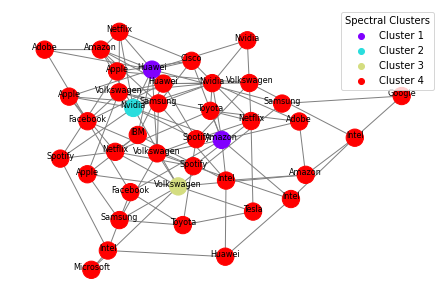

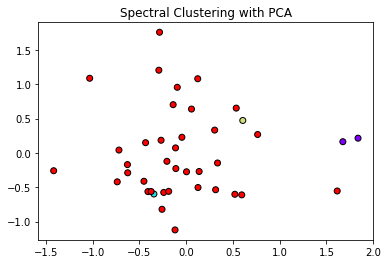

In [61]:
import numpy as np
from scipy.spatial.distance import euclidean
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import rbf_kernel

def estimate_sigma(data):
    # Calculate pairwise distances between data points
    pairwise_distances = euclidean_distances(data, data)
    
    # Set sigma to the mean of the distances
    sigma = np.mean(pairwise_distances)
    
    return sigma

def create_similarity_matrix(data, sigma):
    n = len(data)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            similarity_matrix[i, j] = np.exp(-euclidean(data[i], data[j])**2 / (2 * sigma**2)) 
            similarity_matrix[j, i] = similarity_matrix[i, j]

    return similarity_matrix

def spectral_clustering(similarity_matrix, n_clusters):
    laplacian_matrix = np.diag(np.sum(similarity_matrix, axis=1)) - similarity_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')

    centroids, labels = kmeans(eigenvectors, n_clusters)
    
    return labels

def kmeans(data, k, max_iters=100):
    n, m = data.shape
    centroids = data[np.random.choice(n, k, replace=False)]
    labels = np.zeros(n)
    
    for _ in range(max_iters):
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis=0)
    
    return centroids, labels


# Sigma 값 추정
sigma = estimate_sigma(X)

# 유사성 행렬 생성
similarity_matrix = create_similarity_matrix(X, sigma)

# 스펙트럴 클러스터링
n_clusters = 4
labels = spectral_clustering(similarity_matrix, n_clusters)

# 결과 시각화
colors_sc = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))

nx.draw(random_graph, pos_random, node_color=labels, cmap=plt.cm.rainbow, with_labels=False, edge_color='gray')
for node, position in pos_random.items():
    plt.text(position[0], position[1], s=random_company_names[node], horizontalalignment='center', fontsize=8)
#plt.set_title('Spectral Clustering on Company KG Graph')

for i, color in enumerate(colors_sc):
    plt.scatter([], [], color=color, label=f'Cluster {i+1}')
plt.legend(title="Spectral Clusters", loc="upper right")
plt.show()


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors_sc[labels], edgecolor='k')
plt.title('Spectral Clustering with PCA')
plt.show()


In [57]:
X.shape

(40, 40)

c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


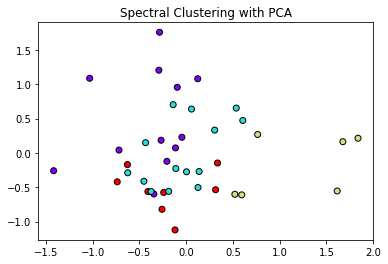

In [59]:
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)

# 모델 학습 및 예측
labels = spectral.fit_predict(X)
colors_sc = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 결과 시각화
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors_sc[labels], edgecolor='k')
plt.title('Spectral Clustering with PCA')
plt.show()



In [65]:
from sklearn.mixture import GaussianMixture

In [66]:
gmm_random = GaussianMixture(n_components=4, random_state=42)
gmm_random_labels = gmm_random.fit_predict(nx.to_numpy_array(random_graph))

c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [72]:
rng = np.random.RandomState(20)
X_stretched = np.dot(X, rng.randn(40, 40))

In [103]:
import pandas as pd
data_df = pd.read_csv('C:/Users/chanyoung/Desktop/RBFfitting/data/sach/saches.csv')
X = data_df.values.T

In [110]:
X[:,:1000].shape

(12, 1000)

c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


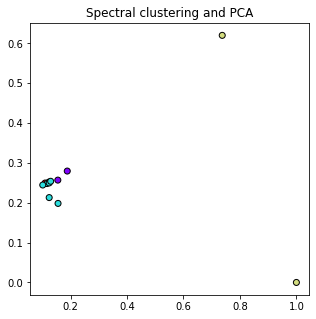

In [146]:
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)

# 모델 학습 및 예측
labels = spectral.fit_predict(X[:,:1000])
colors_sc = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:,:1000])
X_pca_norm = (X_pca - X_pca.min()) / (X_pca.max() - X_pca.min())
# 결과 시각화
plt.figure(figsize=(5, 5))
plt.scatter(X_pca_norm[:, 0], X_pca_norm[:, 1], c=colors_sc[labels], edgecolor='k')
plt.title('Spectral clustering and PCA')
plt.savefig('saches_sc.png')
plt.show()



c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


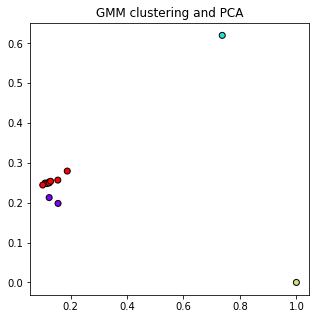

In [145]:
gmm_random = GaussianMixture(n_components=4, random_state=42)
gmm_random_labels = gmm_random.fit_predict(X[:,:1000])
probs = gmm_random.predict_proba(X[:,:1000])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:,:1000])
X_pca_norm = (X_pca - X_pca.min()) / (X_pca.max() - X_pca.min())
# 결과 시각화
plt.figure(figsize=(5, 5))
plt.scatter(X_pca_norm[:, 0], X_pca_norm[:, 1], c=colors_sc[gmm_random_labels], edgecolor='k')
plt.title('GMM clustering and PCA')
plt.savefig('saches_gmm.png')
plt.show()

c:\Users\chanyoung\anaconda3\envs\cooling\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


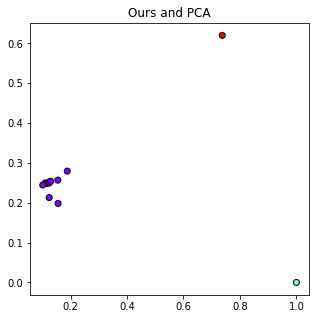

In [143]:
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import rbf_kernel
from scipy.spatial.distance import euclidean
from scipy.sparse.linalg import eigsh



def create_similarity_matrix(data, sigma):
    n = len(data)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(i+1, n):
            similarity_matrix[i, j] = np.exp(-euclidean(data[i], data[j])**2 / (2 * sigma**2)) 
            similarity_matrix[j, i] = similarity_matrix[i, j]

    return similarity_matrix

def spectral_clustering(data, n_clusters):
    sigma = estimate_sigma(data)
    similarity_matrix = create_similarity_matrix(data, sigma)
    laplacian_matrix = np.diag(np.sum(similarity_matrix, axis=1)) - similarity_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')
    gmm_random = GaussianMixture(n_components=n_clusters, random_state=42)
    labels = gmm_random.fit_predict(eigenvectors)
    # centroids, labels = gmm_random(eigenvectors, n_clusters)
    
    return labels

def estimate_sigma(data):
    pairwise_distances = euclidean_distances(data, data)
    sigma = np.mean(pairwise_distances)
    return sigma

def calculate_silhouette_score(data, n_clusters, kernel_matrix=None):
    if kernel_matrix is None:
        sigma = estimate_sigma(data)
        kernel_matrix = np.exp(-euclidean_distances(data, data)**2 / (2 * sigma**2))

    laplacian_matrix = np.diag(np.sum(kernel_matrix, axis=1)) - kernel_matrix
    _, eigenvectors = eigsh(laplacian_matrix, k=n_clusters, which='SM')
    centroids, labels = kmeans(eigenvectors, n_clusters)

    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

def find_optimal_clusters(data, max_clusters, kernel_matrix=None):
    silhouette_scores = []

    for n_clusters in range(2, max_clusters + 1):
        silhouette_avg = calculate_silhouette_score(data, n_clusters, kernel_matrix)
        silhouette_scores.append(silhouette_avg)

    optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
    return optimal_clusters

def spectral_clustering_rbf_auto(data, max_clusters, kernel_matrix=None):
    optimal_clusters = find_optimal_clusters(data, max_clusters, kernel_matrix)
    return spectral_clustering(data, optimal_clusters)


max_clusters = 10  # 최대 클러스터 개수 설정
labels_rbf_auto = spectral_clustering_rbf_auto(X[:,:1000], max_clusters)

# PCA를 사용하여 주성분 2개로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:,:1000])
X_pca_norm = (X_pca - X_pca.min()) / (X_pca.max() - X_pca.min())
# 색상 설정
colors_rbf_auto = plt.cm.rainbow(np.linspace(0, 1, len(set(labels_rbf_auto))))

# 결과 시각화
plt.figure(figsize=(5, 5))
plt.scatter(X_pca_norm[:, 0], X_pca_norm[:, 1], c=colors_rbf_auto[labels_rbf_auto], edgecolor='k')
plt.title('Ours and PCA')
plt.savefig('saches_ours.png')
plt.show()
